In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import graphviz
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

RANDOM_STATE = 103783

In [2]:
def preprocesar_data_frame(df):
    y = df['G3']
    X = df.drop(columns=['G3'])
    return (X, y)

def metricas(y_test,y_pred):
    print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
    print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
    print("R2 Score:",r2_score(y_test,y_pred))

In [3]:
df = pd.read_csv("student-mat.csv")
(X,y) = preprocesar_data_frame(df)
X_prepos = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_prepos, y, test_size=0.25, random_state=RANDOM_STATE)

In [4]:
scaler = Normalizer().fit(X_train)
X_train_normalizado = scaler.transform(X_train)
names = X_train.columns
X_test_normalizado = scaler.transform(X_test)

X_test_normalizado =pd.DataFrame(X_test_normalizado,columns = names)
reg = LinearRegression().fit(X_train_normalizado, y_train)

y_pred = reg.predict(X_test_normalizado)
metricas(y_test,y_pred)

coeficientes = pd.DataFrame(
    {'Feature': X_train.columns, 'Beta': reg.coef_}, columns=['Feature', 'Beta']
)
coeficientes.sort_values(by=['Beta'],ascending=False)

Mean Squared Error: 4.584623192030623
Mean Absolute Error: 1.450112753573663
R2 Score: 0.7972114274524229


,Feature,Beta
15,school_MS,27.572309
14,G2,23.016477
23,Mjob_teacher,15.905487
32,guardian_other,12.530592
21,Mjob_other,12.504679
22,Mjob_services,11.740540
13,G1,11.403443
6,famrel,9.123524
34,famsup_yes,8.661391
16,sex_M,6.889257


1.968129765746752

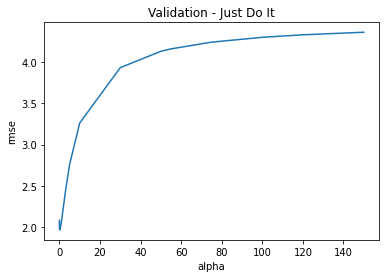

In [5]:
def rmse_cv(model, X_train, y_train):
    rmse = np.sqrt(
        -cross_val_score(
            model, X_train, y_train, scoring="neg_mean_squared_error", cv=5
        )
    )
    return rmse

alphas = [
    0.001,
    0.005,
    0.01,
    0.05,
    0.1,
    0.3,
    1,
    3,
    5,
    10,
    30,
    50,
    55,
    75,
    100,
    120,
    150,
]
cv_ridge = [rmse_cv(Ridge(alpha=alpha), X_train_normalizado, y_train).mean() for alpha in alphas]

cv_ridge_serie = pd.Series(cv_ridge, index=alphas)
cv_ridge_serie.plot(title="Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

cv_ridge_serie.min()

In [6]:
ridge = Ridge(alpha= np.array(alphas)[cv_ridge == cv_ridge_serie.min()])
ridge.fit(X_train_normalizado, y_train)
y_pred = ridge.predict(X_test_normalizado)
metricas(y_test,y_pred)

coeficientes = pd.DataFrame(
    {'Feature': X_train.columns, 'Beta': ridge.coef_}, columns=['Feature', 'Beta']
)
coeficientes.sort_values(by=['Beta'],ascending=False)

Mean Squared Error: 4.052627982519714
Mean Absolute Error: 1.3326040169145725
R2 Score: 0.8207428158828608


,Feature,Beta
14,G2,22.067635
13,G1,10.705809
15,school_MS,7.447547
6,famrel,5.662140
12,absences,3.828199
32,guardian_other,3.338956
16,sex_M,2.550313
1,Medu,2.548994
21,Mjob_other,2.511568
23,Mjob_teacher,2.294553


1.9763208174908722

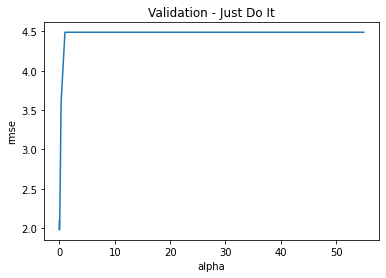

In [7]:
alphas = [
    0.0000001,
    0.000001,
    0.00001,
    0.0001,
    0.001,
    0.005,
    0.01,
    0.05,
    0.1,
    0.3,
    1,
    3,
    5,
    10,
    30,
    50,
    55,
]
cv_lasso = [rmse_cv(Lasso(alpha=alpha), X_train_normalizado, y_train).mean() for alpha in alphas]

cv_lasso_serie = pd.Series(cv_lasso, index=alphas)
cv_lasso_serie.plot(title="Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")
cv_lasso_serie.min()

In [8]:
model_lasso = Lasso(alpha=np.array(alphas)[cv_lasso == cv_lasso_serie.min()])
model_lasso.fit(X_train_normalizado, y_train)
y_pred = model_lasso.predict(X_test_normalizado)
metricas(y_test,y_pred)

coeficientes = pd.DataFrame(
    {'Feature': X_train.columns, 'Beta': model_lasso.coef_}, columns=['Feature', 'Beta']
)
coeficientes.sort_values(by=['Beta'],ascending=False)

Mean Squared Error: 4.063265104860346
Mean Absolute Error: 1.3481610832242952
R2 Score: 0.820272311161945


,Feature,Beta
14,G2,22.593893
13,G1,9.788092
12,absences,3.783279
6,famrel,2.104290
20,Mjob_health,-0.000000
24,Fjob_health,-0.000000
25,Fjob_other,0.000000
26,Fjob_services,-0.000000
27,Fjob_teacher,0.000000
28,reason_home,-0.000000
